In [5]:
using PyPlot
include("src/utils.jl")
include("src/netcdf.jl")
include("src/tsvd.jl")
include("src/gradients.jl")
include("src/linreg.jl")
include("src/maxent.jl")

maxEntJuMP (generic function with 1 method)

In [2]:
function grid_size_analysis(nenergy,npitch)
    dist = read_ncdf("data/test_distributions.cdf")
    wf1 = read_ncdf("data/d3d_transfer_matrix.cdf")
    wf2 = read_ncdf("data/augd_transfer_matrix.cdf")
    
    A_full = [wf1["transfer_matrix"],wf2["transfer_matrix"]]
    energy_full = wf1["energy"]
    pitch_full = wf1["pitch"]
    
    A,energy,pitch = resizeTransferMatrix(A_full,energy_full,pitch_full,nenergy,npitch)
    dE=abs(energy[2]-energy[1])
    dP=abs(pitch[2]-pitch[1])
    
    data1 = read_ncdf("data/d3d_test_data.cdf")
    data2 = read_ncdf("data/augd_test_data.cdf")
    spec = [data1["transp_spec"],data2["transp_spec"]]
    err  = [data1["transp_err"],data2["transp_err"]]
    
    tsvd_f,rchisq,status = tsvd(A,spec[:,7],err[:,7])
    tik0_f,rchisq,status = linRegEP(A,spec[:,7],err[:,7],energy,pitch,method=:Tikhonov0)
    tik1_f,rchisq,status = linRegEP(A,spec[:,7],err[:,7],energy,pitch,method=:Tikhonov1)
    mf_f,rchisq,status = linRegEP(A,spec[:,7],err[:,7],energy,pitch,method=:MinFisher)
    me_f,rchisq,status = maxEnt(A,spec[:,7],err[:,7],Ascale=1e4,rChisq=1.0)
    
    d = bilinear(dist["transp"],energy_full,pitch_full,energy,pitch)
    dmin,dmax = extrema(d)
    fig,ax = plt.subplots(ncols=6,sharey=true)
    fig[:set_size_inches](10,1.7)
    ax[1][:contourf](energy,pitch,d,30,vmin=dmin,vmax=dmax)
    ax[1][:set_title]("True")
    ax[2][:contourf](energy,pitch,reshape(tsvd_f./(dE*dP),npitch,nenergy),30,vmin=dmin,vmax=dmax)
    ax[2][:set_title]("TSVD")
    ax[3][:contourf](energy,pitch,reshape(tik0_f./(dE*dP),npitch,nenergy),30,vmin=dmin,vmax=dmax)
    ax[3][:set_title]("Tik0")
    ax[4][:contourf](energy,pitch,reshape(tik1_f./(dE*dP),npitch,nenergy),30,vmin=dmin,vmax=dmax)
    ax[4][:set_title]("Tik1")
    ax[5][:contourf](energy,pitch,reshape(mf_f./(dE*dP),npitch,nenergy),30,vmin=dmin,vmax=dmax)
    ax[5][:set_title]("MF")
    ax[6][:contourf](energy,pitch,reshape(me_f./(dE*dP),npitch,nenergy),30,vmin=dmin,vmax=dmax)
    ax[6][:set_title]("ME")
    ax[1][:set_yticks]([])
    for i=1:6
        ax[i][:set_xticks]([])
    end
    fig[:tight_layout]()
end

grid_size_analysis (generic function with 1 method)

#10x10 Grid

INFO: Optimal Solution Found!


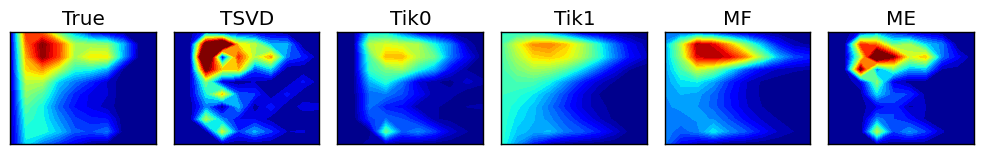

In [7]:
grid_size_analysis(10,10)

#15x15 Grid

INFO: Optimal Solution Found!


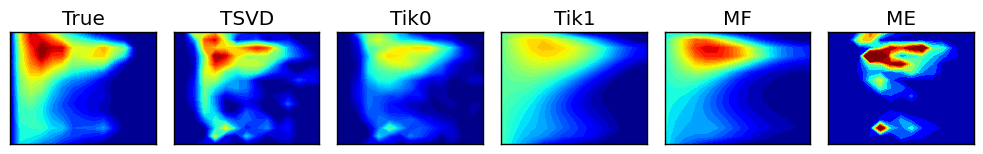

In [6]:
grid_size_analysis(15,15)

#20x20 Grid

INFO: Optimal Solution Found!


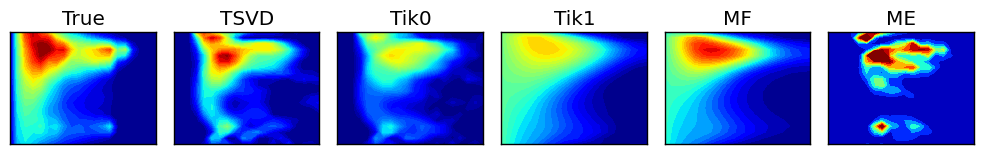

In [8]:
grid_size_analysis(20,20)

#25x25 Grid

INFO: Optimal Solution Found!


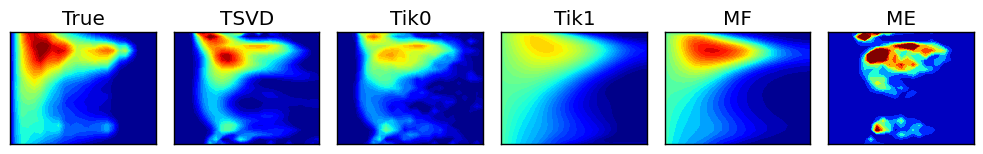

In [9]:
grid_size_analysis(25,25)

#30x30 Grid

INFO: Optimal Solution Found!


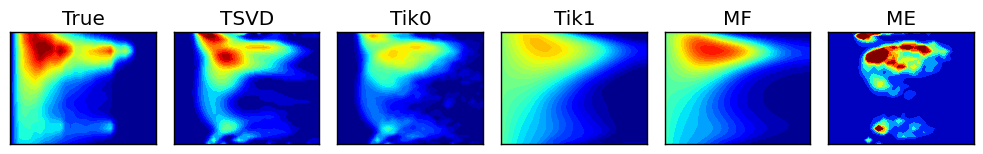

In [10]:
grid_size_analysis(30,30)